In [8]:
import os
import os.path as osp
import sys
from collections import defaultdict
from PIL import Image
import cv2
import json
import numpy as np
from tqdm import tqdm 
def to_pil(cv_img):
    img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    return Image.fromarray(img)

In [22]:
split = 'validation'
imgsrc = '/media/allen/mass/DeepFashion/{}/image'.format(split)
annosrc = '/media/allen/mass/DeepFashion/{}/annos'.format(split)
imgpaths = sorted([osp.join(root, f) for root, _, files in os.walk(imgsrc) for f in files if 'jpg' in f or 'png' in f])

In [23]:
dataset = {
    "info": {},
    "licenses": [],
    "images": [],
    "annotations": [],
    "categories": []
}

dataset['categories'].append({
    'id': 1,
    'name': "short_sleeved_shirt",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})
dataset['categories'].append({
    'id': 2,
    'name': "long_sleeved_shirt",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})
dataset['categories'].append({
    'id': 3,
    'name': "short_sleeved_outwear",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})
dataset['categories'].append({
    'id': 4,
    'name': "long_sleeved_outwear",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})
dataset['categories'].append({
    'id': 5,
    'name': "vest",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})
dataset['categories'].append({
    'id': 6,
    'name': "sling",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})
dataset['categories'].append({
    'id': 7,
    'name': "shorts",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})
dataset['categories'].append({
    'id': 8,
    'name': "trousers",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})
dataset['categories'].append({
    'id': 9,
    'name': "skirt",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})
dataset['categories'].append({
    'id': 10,
    'name': "short_sleeved_dress",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})
dataset['categories'].append({
    'id': 11,
    'name': "long_sleeved_dress",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})
dataset['categories'].append({
    'id': 12,
    'name': "vest_dress",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})
dataset['categories'].append({
    'id': 13,
    'name': "sling_dress",
    'supercategory': "clothes",
    'keypoints': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294'],
    'skeleton': []
})

sub_index = 0 # the index of ground truth instance
for num in tqdm(range(1,len(imgpaths)+1)):
    json_name = osp.join(annosrc, str(num).zfill(6)+'.json')
    image_name = osp.join(imgsrc, str(num).zfill(6)+'.jpg')

    if (num>=0):
        imag = Image.open(image_name)
        width, height = imag.size
        with open(json_name, 'r') as f:
            temp = json.loads(f.read())
            pair_id = temp['pair_id']

            dataset['images'].append({
                'coco_url': '',
                'date_captured': '',
                'file_name': str(num).zfill(6) + '.jpg',
                'flickr_url': '',
                'id': num,
                'license': 0,
                'width': width,
                'height': height
            })
            for i in temp:
                if i == 'source' or i=='pair_id':
                    continue
                else:
                    points = np.zeros(294 * 3)
                    sub_index = sub_index + 1
                    box = temp[i]['bounding_box']
                    w = box[2]-box[0]
                    h = box[3]-box[1]
                    x_1 = box[0]
                    y_1 = box[1]
                    bbox=[x_1,y_1,w,h]
                    cat = temp[i]['category_id']
                    style = temp[i]['style']
                    seg = temp[i]['segmentation']
                    landmarks = temp[i]['landmarks']

                    points_x = landmarks[0::3]
                    points_y = landmarks[1::3]
                    points_v = landmarks[2::3]
                    points_x = np.array(points_x)
                    points_y = np.array(points_y)
                    points_v = np.array(points_v)

                    if cat == 1:
                        for n in range(0, 25):
                            points[3 * n] = points_x[n]
                            points[3 * n + 1] = points_y[n]
                            points[3 * n + 2] = points_v[n]
                    elif cat ==2:
                        for n in range(25, 58):
                            points[3 * n] = points_x[n - 25]
                            points[3 * n + 1] = points_y[n - 25]
                            points[3 * n + 2] = points_v[n - 25]
                    elif cat ==3:
                        for n in range(58, 89):
                            points[3 * n] = points_x[n - 58]
                            points[3 * n + 1] = points_y[n - 58]
                            points[3 * n + 2] = points_v[n - 58]
                    elif cat == 4:
                        for n in range(89, 128):
                            points[3 * n] = points_x[n - 89]
                            points[3 * n + 1] = points_y[n - 89]
                            points[3 * n + 2] = points_v[n - 89]
                    elif cat == 5:
                        for n in range(128, 143):
                            points[3 * n] = points_x[n - 128]
                            points[3 * n + 1] = points_y[n - 128]
                            points[3 * n + 2] = points_v[n - 128]
                    elif cat == 6:
                        for n in range(143, 158):
                            points[3 * n] = points_x[n - 143]
                            points[3 * n + 1] = points_y[n - 143]
                            points[3 * n + 2] = points_v[n - 143]
                    elif cat == 7:
                        for n in range(158, 168):
                            points[3 * n] = points_x[n - 158]
                            points[3 * n + 1] = points_y[n - 158]
                            points[3 * n + 2] = points_v[n - 158]
                    elif cat == 8:
                        for n in range(168, 182):
                            points[3 * n] = points_x[n - 168]
                            points[3 * n + 1] = points_y[n - 168]
                            points[3 * n + 2] = points_v[n - 168]
                    elif cat == 9:
                        for n in range(182, 190):
                            points[3 * n] = points_x[n - 182]
                            points[3 * n + 1] = points_y[n - 182]
                            points[3 * n + 2] = points_v[n - 182]
                    elif cat == 10:
                        for n in range(190, 219):
                            points[3 * n] = points_x[n - 190]
                            points[3 * n + 1] = points_y[n - 190]
                            points[3 * n + 2] = points_v[n - 190]
                    elif cat == 11:
                        for n in range(219, 256):
                            points[3 * n] = points_x[n - 219]
                            points[3 * n + 1] = points_y[n - 219]
                            points[3 * n + 2] = points_v[n - 219]
                    elif cat == 12:
                        for n in range(256, 275):
                            points[3 * n] = points_x[n - 256]
                            points[3 * n + 1] = points_y[n - 256]
                            points[3 * n + 2] = points_v[n - 256]
                    elif cat == 13:
                        for n in range(275, 294):
                            points[3 * n] = points_x[n - 275]
                            points[3 * n + 1] = points_y[n - 275]
                            points[3 * n + 2] = points_v[n - 275]
                    num_points = len(np.where(points_v > 0)[0])

                    dataset['annotations'].append({
                        'area': w*h,
                        'bbox': bbox,
                        'category_id': cat,
                        'id': sub_index,
                        'pair_id': pair_id,
                        'image_id': num,
                        'iscrowd': 0,
                        'style': style,
                        'num_keypoints':num_points,
                        'keypoints':points.tolist(),
                        'segmentation': seg,
                    })


json_name = '/media/allen/mass/DeepFashion/deepfashion2_validation.json'
with open(json_name, 'w') as f:
  json.dump(dataset, f)

100%|██████████| 32153/32153 [10:52<00:00, 49.27it/s]


In [26]:
import pycocotools.coco as COCO
coco = COCO.COCO(json_name)

loading annotations into memory...
Done (t=10.23s)
creating index...
index created!


In [27]:
cats = coco.loadCats(coco.getCatIds())

In [31]:
imgIds = coco.getImgIds()
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [33]:
coco.getAnnIds(imgIds=[5])

[7]

In [43]:
coco.loadAnns(ids=[7])[0]['category_id']

1

In [39]:
np.array(coco.loadAnns(ids=[7])[0]['keypoints']).reshape(294,3)

array([[426.,  12.,   1.],
       [  0.,   0.,   0.],
       [346.,  40.,   2.],
       [380.,  70.,   2.],
       [425.,  80.,   2.],
       [  0.,   0.,   0.],
       [215.,  11.,   2.],
       [151., 105.,   2.],
       [ 90., 236.,   2.],
       [157., 282.,   2.],
       [174., 216.,   2.],
       [194., 138.,   2.],
       [190., 158.,   2.],
       [124., 375.,   2.],
       [ 57., 539.,   2.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [460., 519.,   2.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
 

In [17]:
annos = []
for path in imgpaths:
    img = cv2.imread(path)
    fname = osp.splitext(osp.basename(path))[0]
    f = open(osp.join(annosrc, "{}.json".format(fname)))
    raw_anno = json.loads(f.readline())
    num_objs = len(raw_anno) - 2
    anno = defaultdict(dict)
    for k in range(1, num_objs+1):
        for key in ['landmarks', 'bounding_box', 'category_id', 'occlusion', 'category_name']:
            anno[k-1][key] = raw_anno["item{}".format(k)][key]
    annos.append(anno)
    break

KeyboardInterrupt: 

In [21]:
annos[0][0]['landmarks']

[182,
 54,
 1,
 45,
 91,
 1,
 137,
 103,
 1,
 228,
 123,
 1,
 261,
 89,
 1,
 257,
 35,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 47,
 447,
 2,
 151,
 401,
 2,
 141,
 366,
 2,
 129,
 328,
 2,
 141,
 364,
 2,
 219,
 485,
 2,
 274,
 603,
 2,
 401,
 590,
 2,
 0,
 0,
 0,
 442,
 336,
 2,
 369,
 195,
 1,
 348,
 138,
 1,
 363,
 163,
 1,
 372,
 197,
 1,
 433,
 137,
 2,
 396,
 92,
 2,
 341,
 35,
 1]

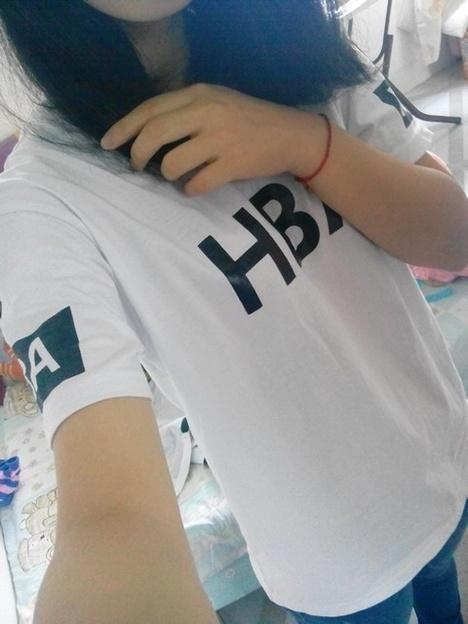

In [27]:
to_pil(img)

In [13]:
for key in anno.keys():
    if 'item' in key:
        

dict_keys(['item2', 'source', 'pair_id', 'item1'])

In [61]:
keypoints = [anno['item2']['landmarks'][3*i:3*i+3] for i in range(len(anno['item2']['landmarks'])//3)]


In [46]:
keypoints

[[182, 54, 1],
 [45, 91, 1],
 [137, 103, 1],
 [228, 123, 1],
 [261, 89, 1],
 [257, 35, 1],
 [0, 0, 0],
 [0, 0, 0],
 [47, 447, 2],
 [151, 401, 2],
 [141, 366, 2],
 [129, 328, 2],
 [141, 364, 2],
 [219, 485, 2],
 [274, 603, 2],
 [401, 590, 2],
 [0, 0, 0],
 [442, 336, 2],
 [369, 195, 1],
 [348, 138, 1],
 [363, 163, 1],
 [372, 197, 1],
 [433, 137, 2],
 [396, 92, 2],
 [341, 35, 1]]

In [53]:
points = [[j, polygon[2*i:2*i+2]] for j, polygon in enumerate(anno['item1']['segmentation']) for i in range(len(polygon)//2)]

In [54]:
points

[[0, [257, 35]],
 [0, [261, 89]],
 [0, [228, 123]],
 [0, [137, 103]],
 [0, [45, 91]],
 [0, [1, 176]],
 [0, [0, 332]],
 [0, [47, 447]],
 [0, [151, 401]],
 [0, [141, 366]],
 [0, [129, 328]],
 [0, [141, 364]],
 [0, [219, 485]],
 [0, [274, 603]],
 [0, [401, 590]],
 [0, [467, 502]],
 [0, [442, 336]],
 [0, [369, 195]],
 [0, [348, 138]],
 [0, [363, 163]],
 [0, [372, 197]],
 [0, [433, 137]],
 [0, [396, 92]],
 [0, [341, 35]],
 [0, [257, 35]],
 [1, [1, 176]],
 [1, [0, 332]],
 [1, [47, 447]],
 [1, [151, 401]],
 [1, [141, 366]],
 [1, [129, 328]],
 [1, [1, 176]],
 [2, [348, 138]],
 [2, [363, 163]],
 [2, [372, 197]],
 [2, [433, 137]],
 [2, [396, 92]],
 [2, [341, 35]],
 [2, [348, 138]]]

In [ ]:
np.random.seed(tid)
color = (int(np.random.randint(0,256,1)[0]), int(np.random.randint(0,256,1)[0]), int(np.random.randint(0,256,1)[0]))
cv2.rectangle(to_plot, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 3)
cv2.rectangle(to_plot, (bbox[0], bbox[1]), (int(bbox[0]+50), int(bbox[1]+50)), color, -1)
cv2.putText(to_plot, str(tid), (int(bbox[0]+15), int(bbox[1]+35)), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,0), 2)

In [62]:
to_plot = img.copy()
for pt in keypoints:
    x, y, _ = pt   
    img = cv2.circle(to_plot, (x, y), 5, (0,0,0), -1)

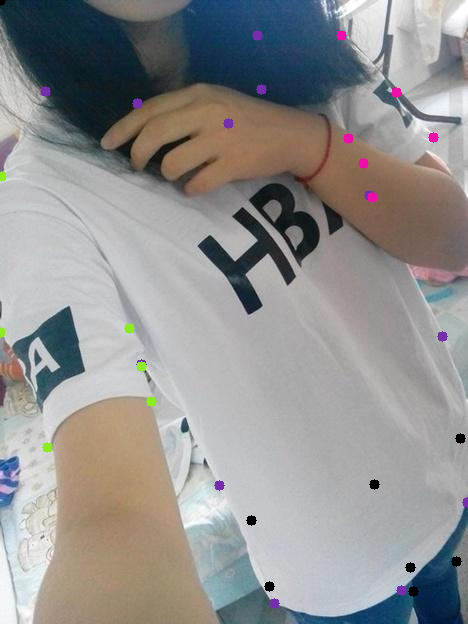

In [63]:
to_pil(img)